# Network 1
An experiment in implementing a network object

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from path import path

In [3]:
import network
import touchstone
from touchstone import read_touchstone

Conversion tests successful


Import a Network object from an s2p file

In [11]:
S2, A2 = read_touchstone("noises.s2p")
S2

The dataset attribute contains a xarray Dataset containing the port parameters (matrix) [S, Z, or Y...], the correlation matrix (Cmatrix), port impedance vector (portimpedance).

In [12]:
S2.dataset

<xarray.Dataset>
Dimensions:        (Freq: 49, i: 2, j: 2)
Coordinates:
  * Freq           (Freq) float64 2e+09 2.25e+09 2.5e+09 2.75e+09 3e+09 ...
  * i              (i) int32 1 2
  * j              (j) int32 1 2
Data variables:
    Cmatrix        (Freq, i, j) complex128 (2.76896436324e-22-1.83670992316e-40j) ...
    portimpedance  int32 50
    matrix         (Freq, i, j) complex128 (0.93679359303-0.131657753508j) ...
Attributes:
    unit: ('',)
    networkkind: S
    temperature: (290,)

Frequency points missing between the matrix and Cmatrix are indicated by nan.
In this s2p file 2.25 GHz is missing from the Noise parameter data.

In [18]:
abs(S2.dataset.Cmatrix[:3,0,0])

<xarray.DataArray 'Cmatrix' (Freq: 3)>
array([  2.76896436e-22,              nan,   3.55765917e-22])
Coordinates:
  * Freq     (Freq) float64 2e+09 2.25e+09 2.5e+09
    i        int32 1
    j        int32 1

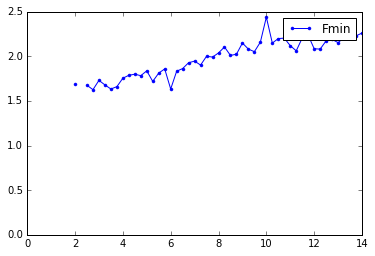

In [19]:
N = S2.noise_parameters()
plt.plot(N.Freq/1e9, N.Fmin, ".-", label="Fmin")
plt.axis(xmin=0, ymin=0)
plt.legend()

(0, 14.0, 5.0, 40.0)

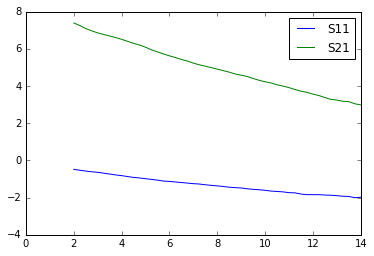

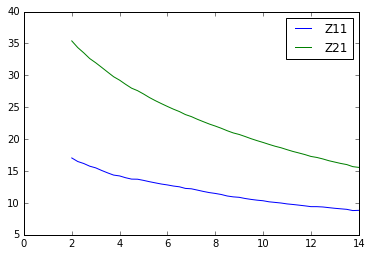

In [20]:
plt.figure(1)
plt.plot(S2.dataset.Freq/1e9, dB(S2.dataset.matrix[...,0,0]), label="S11")
plt.plot(S2.dataset.Freq/1e9, dB(S2.dataset.matrix[...,1,0]), label="S21")
plt.legend()
plt.axis(xmin=0)
plt.figure(2)
plt.plot(S2.dataset.Freq/1e9, dB(S2.convert("Z").dataset.matrix[...,0,0]), label="Z11")
plt.plot(S2.dataset.Freq/1e9, dB(S2.convert("Z").dataset.matrix[...,1,0]), label="Z21")
plt.legend()
plt.axis(xmin=0)